# **Titanic Survival Prediction**




## **Author: Abdur Rahman**




## **Objective**
The sinking of the Titanic is one of the most infamous wrecks in history. On April 15, 1912, during her maiden voyage, the RMS Titanic, widely considered “unsinkable”, sank after hitting an iceberg. Here, your challenge is to build a predictive model that can give a solution to the question, “What types of people were more likely to survive?” using passenger data (i.e. name, age, sex, socio-economic class, etc.).



In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [13]:
# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [14]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
# Data Preprocessing and Feature Engineering

# Combining train and test datasets for consistent preprocessing
combined_df = pd.concat([train_df, test_df], ignore_index=True)

# Handling Missing Values
combined_df['Age'].fillna(combined_df['Age'].median(), inplace=True)
combined_df['Fare'].fillna(combined_df['Fare'].median(), inplace=True)
combined_df['Embarked'].fillna(combined_df['Embarked'].mode()[0], inplace=True)

# Feature Engineering

# Extract titles from names
combined_df['Title'] = combined_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
combined_df['Title'] = combined_df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
combined_df['Title'] = combined_df['Title'].replace('Mlle', 'Miss')
combined_df['Title'] = combined_df['Title'].replace('Ms', 'Miss')
combined_df['Title'] = combined_df['Title'].replace('Mme', 'Mrs')
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
combined_df['Title'] = combined_df['Title'].map(title_mapping)
combined_df.drop(['Name'], axis=1, inplace=True)

# Create a new feature 'FamilySize'
combined_df['FamilySize'] = combined_df['SibSp'] + combined_df['Parch'] + 1

# Create a new feature 'IsAlone'
combined_df['IsAlone'] = 0
combined_df.loc[combined_df['FamilySize'] == 1, 'IsAlone'] = 1

# Convert categorical variables to numerical using one-hot encoding
combined_df = pd.get_dummies(combined_df, columns=['Sex', 'Embarked'])

# Drop irrelevant or highly correlated features
combined_df.drop(['PassengerId', 'Cabin', 'Ticket'], axis=1, inplace=True)

# Splitting back into train and test datasets
train_preprocessed = combined_df[:len(train_df)]
test_preprocessed = combined_df[len(train_df):]

# Separate target variable
X_train = train_preprocessed.drop('Survived', axis=1)
y_train = train_preprocessed['Survived']
X_test = test_preprocessed.drop('Survived', axis=1)

# Display the preprocessed data
X_train.head()


,Pclass,Age,SibSp,Parch,Fare,Title,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,2,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,3,2,0,1,0,1,0,0
2,3,26.0,0,0,7.9250,2,1,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,3,2,0,1,0,0,0,1
4,3,35.0,0,0,8.0500,1,1,1,0,1,0,0,1


In [17]:
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Title', 'FamilySize',
       'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [18]:
# Split data into features and target
X = train_preprocessed.drop('Survived', axis=1)
y = train_preprocessed['Survived']

In [19]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [21]:
# Model Selection and Training
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [22]:
# Model Evaluation
def evaluate_model(model, X, y_true):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y_true, y_pred)

    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

Random Forest Model Evaluation:
Accuracy: 0.8268156424581006
Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.86      0.85       105
         1.0       0.79      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



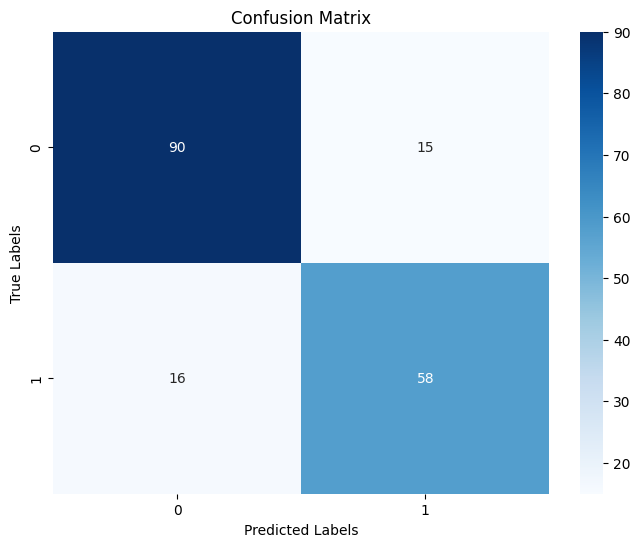

In [23]:
print("Random Forest Model Evaluation:")
evaluate_model(rf_model, X_val_scaled, y_val)

In [24]:
# Making Predictions on Test Data
X_test_scaled = scaler.transform(test_preprocessed.drop('Survived', axis=1))
rf_predictions = rf_model.predict(X_test_scaled)


In [25]:
# Create submission file
submission_df = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': rf_predictions})
submission_df.to_csv('submission.csv', index=False)

# **Thanks!**